## 2) Salary_hike -> Build a prediction model for Salary_hike

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
df=pd.read_csv("D:\\DATA SCIENCE\\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x17da7869190>,
 'caps': [<matplotlib.lines.Line2D at 0x17da7869850>,
 'boxes': [<matplotlib.lines.Line2D at 0x17da7854df0>],
 'medians': [<matplotlib.lines.Line2D at 0x17da7869f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x17da7ac52b0>],
 'means': []}

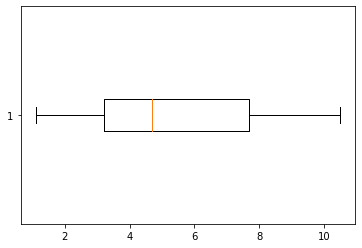

In [6]:
plt.boxplot(df['YearsExperience'],vert=False)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

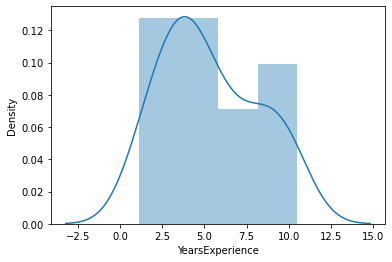

In [7]:
sns.distplot(df['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17da7c95cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17da7ca4400>,
 'boxes': [<matplotlib.lines.Line2D at 0x17da7c95970>],
 'medians': [<matplotlib.lines.Line2D at 0x17da7ca4ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17da7ca4e20>],
 'means': []}

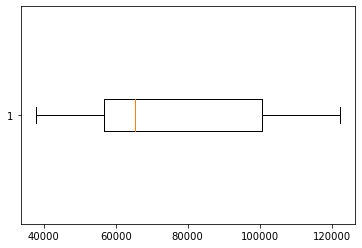

In [8]:
plt.boxplot(df['Salary'],vert=False)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

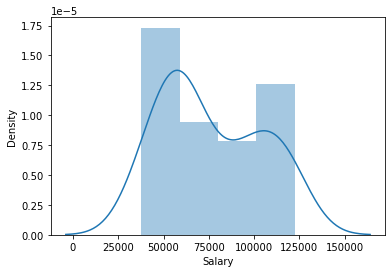

In [9]:
sns.distplot(df['Salary'])

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
#renames of columns
df=df.rename({'YearsExperience':'E','Salary':'S'},axis=1)

In [12]:
df.head()

,E,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


##### We have to predict salary for given experience

In [13]:
import statsmodels.formula.api as smf
model=smf.ols('S~E',data=df).fit()

<AxesSubplot:xlabel='E', ylabel='S'>

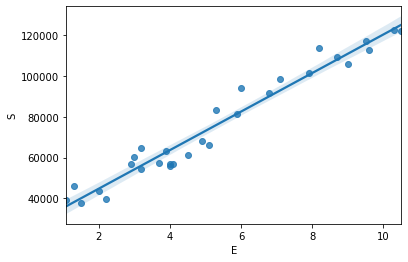

In [14]:
sns.regplot(x='E',y='S',data=df)

In [15]:
model.params

Intercept    25792.200199
E             9449.962321
dtype: float64

In [16]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    11.346940
E            24.950094
dtype: float64 
 Intercept    5.511950e-12
E            1.143068e-20
dtype: float64


In [17]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        10:28:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
E           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Transformations

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(df)

In [20]:
data=pd.DataFrame(data,index=df.index,columns=df.columns)
data.head()

,E,S
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [21]:
#Again build a model
new_ml1=smf.ols('S~E',data=data).fit()
new_ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        10:28:55   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e-18      0.039  -1.77e-16      1.000      -0.080       0.080
E              0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict for new data points

In [22]:
newdata=pd.Series([2.2,6.6,9.9])
pred_data=pd.DataFrame(newdata,columns=['E'])
model.predict(pred_data)

0     46582.117306
1     88161.951520
2    119346.827181
dtype: float64

In [23]:
y=np.array(data['S'])

In [24]:
y_pred=new_ml1.predict(data)

In [25]:
#check RMSE
import sklearn.metrics as mt
mse=mt.mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)  #mse**(0.5)
rmse

0.2074688792481693